<a href="https://colab.research.google.com/github/fbeilstein/presentations/blob/master/svm_problem_for_July_5_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

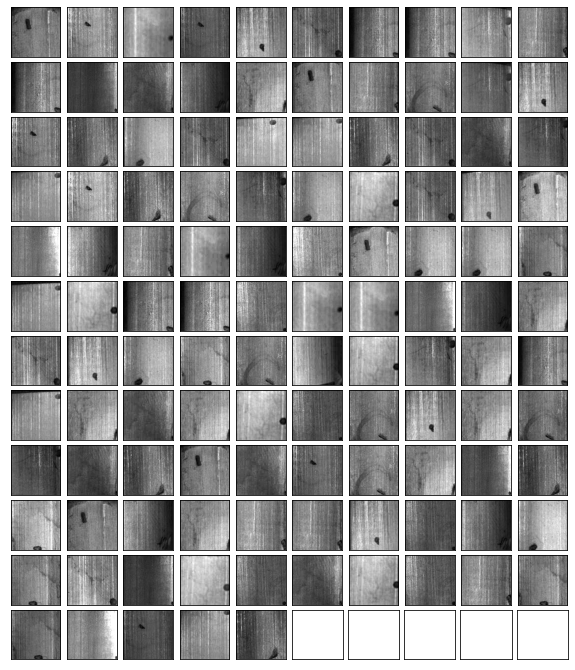

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

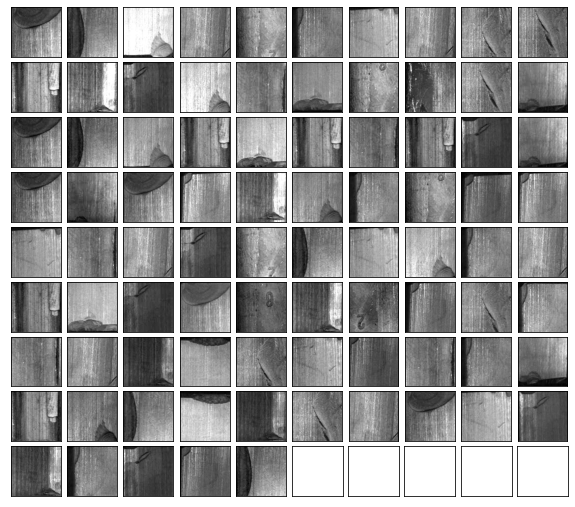

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

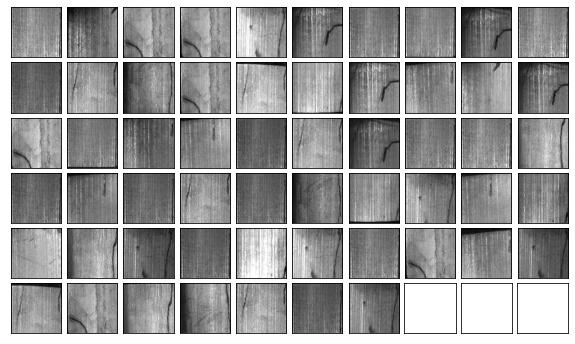

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

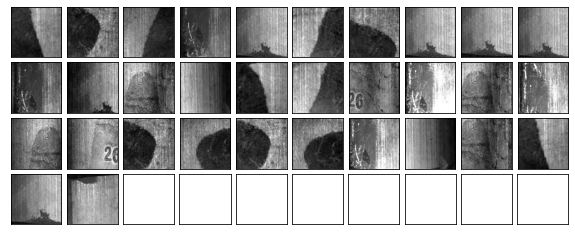

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

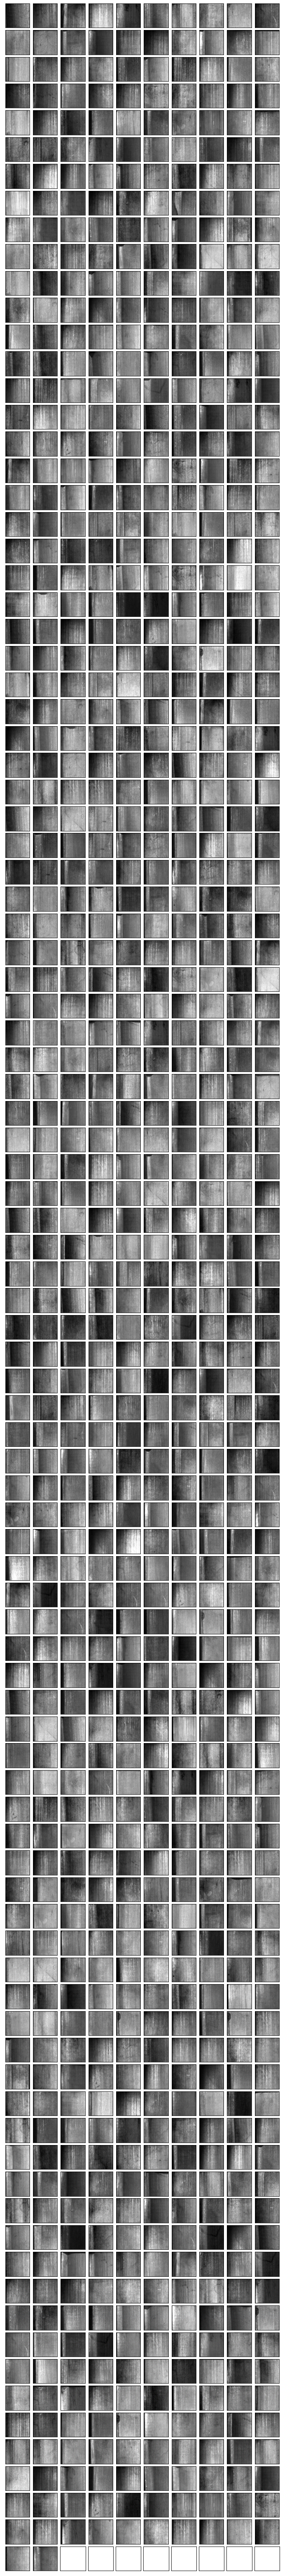

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

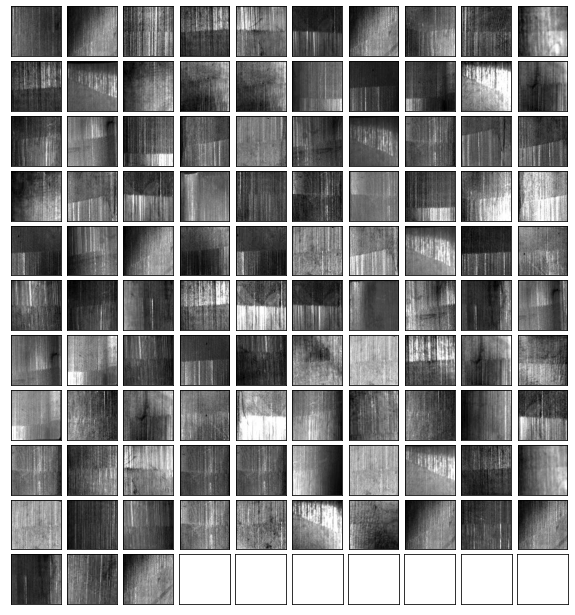

<IPython.core.display.Javascript object>

In [5]:
#@title #Download and import dataset
#@markdown Run this block of code to download the dataset (images) for classification.
#@markdown This is a simplified version of the https://www.kaggle.com/alex000kim/magnetic-tile-surface-defects dataset from Kaggle.
#@markdown You may want to check the description of the original dataset for more information.
#@markdown Make sure no error occurs, otherwise ask for help.
#@markdown
#@markdown After execution is complete, the dataset is ready to use.
#@markdown You will get few variables defined, names listed below
#@markdown 
#@markdown |variable|meaning|
#@markdown ---|---
#@markdown `im_blowhole` | the blowhole defect
#@markdown `im_break` |
#@markdown `im_crack` |
#@markdown `im_fray` | 
#@markdown `im_free` | NO DEFECT
#@markdown `im_uneven` | 
#@markdown 
#@markdown Each variable is a 3-dimensional numpy array.
#@markdown The 0-th axis corresponds to the image, i.e. `im_crack[12]` is the 12-th image with crack.
#@markdown Use `shape[0]` to detect number of images.
#@markdown The rest two coordinates correspont to the X-Y in of the image.
#@markdown Each image is 100x100.
#@markdown Overview of all images will be available after execution is complete.


!wget https://raw.githubusercontent.com/fbeilstein/presentations/master/datasets/defects.zip
!unzip -o defects.zip

from google.colab import output
output.clear()

import numpy as np

def load_images(folder):
  import os
  from matplotlib import image
  imgs = np.array([image.imread(folder+'/'+filename) for filename in os.listdir(folder)], dtype=float)
  return imgs

im_blowhole = load_images('blowhole')
im_break = load_images('break')
im_crack = load_images('crack')
im_fray = load_images('fray')
im_free = load_images('free')
im_uneven = load_images('uneven')

import matplotlib.pyplot as plt

def plot_all(images):
  columns = 10
  rows = (images.shape[0] + columns - 1) // columns
  fig, axes = plt.subplots(rows, columns, figsize=(columns, rows), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

  for i, ax in zip(range(images.shape[0]), axes.flat):
    ax.imshow(images[i], cmap='gray')

  plt.show()

def do_visualization():
  from google.colab import widgets
  names = ['im_blowhole', 'im_break', 'im_crack', 'im_fray', 'im_free', 'im_uneven']
  data = [im_blowhole, im_break, im_crack, im_fray, im_free, im_uneven]
  tb = widgets.TabBar(names, location='top')
  for i in range(len(names)):
    with tb.output_to(i):
      plot_all(data[i])

do_visualization()

Example of single image visualization

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(im_blowhole[2], cmap='gray')
plt.show()

In [ ]:
from itertools import chain
from skimage import feature
X_train = np.array([feature.hog(im) for im in chain(im_free, im_blowhole)])
y_train = np.zeros(X_train.shape[0])
y_train[:im_free.shape[0]] = 1
X_train.shape

(1067, 8100)

In [ ]:
# Grid search for best parameters
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

#from sklearn.svm import SVC
#model = SVC(kernel='rbf', C=1E1, gamma='auto')
#model.fit(X_train, y_train)

grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]}, cv=3)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_
model.fit(X_train, y_train)

In [ ]:
np.sum(model.predict(X_train) - y_train)